In [6]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from bs4 import BeautifulSoup
import requests

%matplotlib inline

In [12]:
IMAGES_PATH = '/Users/sorrosn/Desktop/ocr_images/'

def find_mosaic_url(img_path, rotate=-90, verbose=False):
    img=Image.open(img_path)
    img = img.rotate(rotate)

    ocr_text = pytesseract.image_to_string(img)
    ocr_title = ocr_text.split('\n\n')[0]

    if verbose:
        print(f"OCR text: {ocr_text}")
        print(f"OCR title: {ocr_title}")
        plt.imshow(np.asarray(img))
    
    google_url = 'https://www.google.co.uk/search'
    mosaic_url = 'https://mosaicscience.com/'
    params = {
        'q': f"site:{mosaic_url} {ocr_title}"
    }

    response = requests.get(google_url, params=params)

    soup = BeautifulSoup(response.text, 'html.parser')
    first_result = soup.find('h3', {'class': 'r'})

    if not first_result:
        google_url = 'https://www.google.co.uk/search'
        params = {
            'q': f"{ocr_text}"
        }

        response = requests.get(google_url, params=params)

        soup = BeautifulSoup(response.text, 'html.parser')
        first_result = soup.find('h3', {'class': 'r'})

    result_url = None
    if first_result:
        result_url = first_result.a['href'].split('/url?q=')[1].split('&')[0]
        
        
    if verbose:
        print(result_url)

OCR text: Do you get
interrupted
in meetings?

How inclusive Is Wellcome’?

Take the inclusion survey
by Friday 5 Oct so we can
understand your experiences.

Go to Trustnet to find out more.
OCR title: Do you get
interrupted
in meetings?
https://mosaicscience.com/story/saved-how-addicts-gained-power-reverse-overdoses


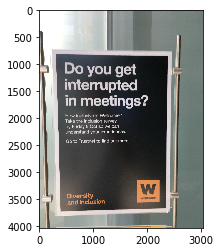

In [13]:
img_path = f"{IMAGES_PATH}/non_mosaic_article.JPG"
find_mosaic_url(img_path, rotate=0, verbose=True)